In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1 
from sklearn.metrics import roc_auc_score

In [4]:
df = pd.read_excel('auto_complectations.xlsx')

In [5]:
df

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,...,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.8 секунды,250 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.2 секунды,242 км/ч,7.2 / 4.8 / 5.7,165 мм,4458 × 1796 × 1416,2637 мм,390 л,845 л,55 л,1465 кг
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.8 секунды,242 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,Volvo,XC90,D5 AT 5S R-Design,Большой кроссовер,5,5,дизельный (1969 см³),235 л. с.,480 Н·м,автоматическая (8 ступеней),...,7.8 секунды,220 км/ч,6.4 / 5.5 / 5.8,237 мм,4950 × 2008 × 1776,2984 мм,721 л,1899 л,71 л,1969 кг
1699,Volvo,XC90,T6 AT 7S R-Design,Большой кроссовер,7,5,бензиновый (1969 см³),320 л. с.,400 Н·м,автоматическая (8 ступеней),...,6.5 секунды,230 км/ч,0 / 0 / 8.3,237 мм,4950 × 2008 × 1776,2984 мм,692 л,1899 л,71 л,2004 кг
1700,Volvo,XC90,D5 AT 7S R-Design,Большой кроссовер,7,5,дизельный (1969 см³),235 л. с.,480 Н·м,автоматическая (8 ступеней),...,7.8 секунды,220 км/ч,6.4 / 5.5 / 5.8,237 мм,4950 × 2008 × 1776,2984 мм,692 л,1899 л,71 л,2009 кг
1701,Volvo,XC90,T8 AT 7S Inscription,Большой кроссовер,7,5,гибридный (1969 см³),407 л. с.,640 Н·м,автоматическая (8 ступеней),...,5.6 секунды,230 км/ч,0 / 0 / 2.1,237 мм,4950 × 2008 × 1776,2984 мм,640 л,1899 л,70 л,2350 кг


In [6]:
#Седан - Хетчбек - Кроссовер - Внедорожник - Универсал - Минивэн - Компактвэн - Купе - Кабриолет - Спортседан - Родстер.
#Пикап - Спорткупе
df['type_car'].unique()

array(['Седан класса C', 'Хэтчбек класса B', 'Седан класса D',
       'Универсал повышенной проходимости класса D', 'Универсал класса D',
       'Купе класса D', 'Хэтчбек класса D', 'Седан класса E',
       'Универсал класса E', 'Хэтчбек класса E', 'Седан класса F',
       'Большой кроссовер', 'Компактный кроссовер',
       'Среднеразмерный кроссовер', 'Купе класса C', 'Спорткупе',
       'Кабриолет с мягкой крышей', 'Спорткупе класса D',
       'Спортседан класса E', 'Родстер', 'Большой внедорожник',
       'Седан класса B', 'Хэтчбек класса A', 'Кроссовер класса B', 'Вэн',
       'Горячий хэтчбек класса C', 'Внедорожник класса B',
       'Среднеразмерный внедорожник', 'Хэтчбек класса C',
       'Универсал класса C', 'Спортседан класса D', 'Купе класса E',
       'Пикап', 'Горячий седан класса C', 'Минивэн', 'Компактвэн',
       'Универсал повышенной проходимости класса E'], dtype=object)

In [37]:
#массив классов
classes = ['седан', 'хетчбек', 'кроссовер', 'внедорожник', 'универсал', 'минивэн', 'компактвэн', 'купе', 'кабриолет', 'спортседан', 'родстер', 'пикап', 'спорткупе', 'вэн']
len(classes)

14

In [54]:
def get_class_car(type_car):
    classes = ['седан', 'хэтчбек', 'кроссовер', 'внедорожник', 'универсал', 'минивэн', 'компактвэн', 'купе', 'кабриолет', 'спортседан', 'родстер', 'пикап', 'спорткупе', 'вэн']

    type_car = type_car.casefold()
    array_car =  type_car.split()
    i = 0
    for class_car in classes:
        if class_car in array_car:
            return i
        i += 1 

In [39]:
#Добавление новой категориальной переменной
df["target"] = df["type_car"].apply(lambda x: get_class_car(x))

In [40]:
max(df['target'])

13

In [41]:
len(df)

1703

In [42]:
#преобразовать все переменные в числовые
#преобразовать категориальные в dummy-переменные
#составное поле из 3 частей разбить на 3 поля

In [68]:
df['brand'].unique()

array(['Audi', 'BMW', 'Cadillac', 'Chevrolet', 'Citroen', 'Genesis',
       'Infiniti', 'Hyundai', 'Honda', 'Jaguar', 'Jeep', 'KIA',
       'Land Rover', 'Lexus', 'Mazda', 'Mercedes-Benz', 'Mitsubishi',
       'Nissan', 'Opel', 'Peugeot', 'Renault', 'Skoda', 'Subaru',
       'Suzuki', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [67]:
pd.get_dummies(df["brand"])

,Audi,BMW,Cadillac,Chevrolet,Citroen,Genesis,Honda,Hyundai,Infiniti,Jaguar,...,Nissan,Opel,Peugeot,Renault,Skoda,Subaru,Suzuki,Toyota,Volkswagen,Volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [69]:
df[['Audi', 'BMW', 'Cadillac', 'Chevrolet', 'Citroen', 'Genesis',
       'Infiniti', 'Hyundai', 'Honda', 'Jaguar', 'Jeep', 'KIA',
       'Land Rover', 'Lexus', 'Mazda', 'Mercedes-Benz', 'Mitsubishi',
       'Nissan', 'Opel', 'Peugeot', 'Renault', 'Skoda', 'Subaru',
       'Suzuki', 'Toyota', 'Volkswagen', 'Volvo']] = pd.get_dummies(df["brand"])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 22 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   brand                                                 1703 non-null   object
 1   model                                                 1703 non-null   object
 2   complect                                              1703 non-null   object
 3   type_car                                              1703 non-null   object
 4   seats                                                 1703 non-null   int64 
 5   doors                                                 1703 non-null   int64 
 6   Двигатель                                             1703 non-null   object
 7   Мощность                                              1703 non-null   object
 8   Крутящий момент двигателя                             1703 non-null 

In [48]:
df['Двигатель'].unique()

array(['бензиновый (1395 см³)', 'бензиновый (1984 см³)',
       'дизельный (1968 см³)', 'дизельный (2967 см³)',
       'бензиновый (2995 см³)', 'бензиновый (3996 см³)',
       'электрический (0 см³)', 'бензиновый (1985 см³)',
       'бензиновый (2984 см³)', 'дизельный (3956 см³)',
       'бензиновый (1499 см³)', 'бензиновый (2998 см³)',
       'бензиновый (1998 см³)', 'дизельный (1995 см³)',
       'дизельный (2993 см³)', 'бензиновый (4395 см³)',
       'бензиновый (6592 см³)', 'гибридный (1499 см³)',
       'бензиновый (2979 см³)', 'бензиновый (2993 см³)',
       'бензиновый (3649 см³)', 'бензиновый (6162 см³)',
       'бензиновый (1485 см³)', 'бензиновый (1249 см³)',
       'бензиновый (3564 см³)', 'бензиновый (1199 см³)',
       'дизельный (1560 см³)', 'бензиновый (1587 см³)',
       'бензиновый (1598 см³)', 'дизельный (1997 см³)',
       'бензиновый (3342 см³)', 'бензиновый (3778 см³)',
       'бензиновый (5038 см³)', 'бензиновый (2497 см³)',
       'дизельный (2996 см³)', 'бензино

In [56]:
def get_class_engine(type_engine):
    classes = ['дизельный', 'бензиновый', 'гибридный']

    type_engine = type_engine.casefold()
    array_ =  type_engine.split()
    for class_engine in classes:
        if class_engine in array_:
            return class_engine

In [57]:
df["type_engine"] = df["Двигатель"].apply(lambda x: get_class_engine(x))

In [58]:
df["type_engine"]

0       бензиновый
1       бензиновый
2       бензиновый
3       бензиновый
4       бензиновый
           ...    
1698     дизельный
1699    бензиновый
1700     дизельный
1701     гибридный
1702     гибридный
Name: type_engine, Length: 1703, dtype: object

In [60]:
pd.get_dummies(df["type_engine"])

,бензиновый,гибридный,дизельный
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1698,0,0,1
1699,1,0,0
1700,0,0,1
1701,0,1,0


In [61]:
df[['бензиновый','гибридный','дизельный']] = pd.get_dummies(df["type_engine"])


In [55]:
df['Коробка передач'].unique()

array(['роботизированная (7 ступеней)', 'автоматическая (8 ступеней)',
       'автоматическая (1 ступеней)', 'роботизированная (6 ступеней)',
       'механическая (6 ступеней)', 'автоматическая (6 ступеней)',
       'автоматическая (10 ступеней)', 'автоматическая (9 ступеней)',
       'механическая (5 ступеней)', 'автоматическая (4 ступеней)',
       'автоматическая (7 ступеней)', 'вариатор (0 ступеней)',
       'автоматическая (5 ступеней)', 'роботизированная (8 ступеней)',
       'автоматическая (0 ступеней)', 'роботизированная (9 ступеней)'],
      dtype=object)

In [63]:
df['Привод'].unique()


array(['передний', 'полный', 'задний'], dtype=object)

In [65]:
pd.get_dummies(df["Привод"])

,задний,передний,полный
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
1698,0,0,1
1699,0,0,1
1700,0,0,1
1701,0,0,1


In [66]:
df[['задний','передний','полный']] = pd.get_dummies(df["Привод"])


In [75]:
def get_cifra(feature):
    array_ =  feature.split()
    try:
        return float(array_[0])
    except:
        return 0

In [ ]:
#7   Мощность                                              1703 non-null   object
# 8   Крутящий момент двигателя                             1703 non-null   object
# 9   Коробка передач                                       1703 non-null   object
# 10  Привод                                                1703 non-null   object
# 11  Разгон до сотни                                       1703 non-null   object
# 12  Максимальная скорость                                 1703 non-null   object
# 13  Расход топлива (л/100 км)
#город / трасса / смешанный  1703 non-null   object
# 14  df["Мощность"] = df["Мощность"].apply(lambda x: get_cifra(x))
#df["Крутящий момент двигателя"] = df["Крутящий момент двигателя"].apply(lambda x: get_cifra(x))
#df["Разгон до сотни"] = df["Разгон до сотни"].apply(lambda x: get_cifra(x))
#df["Максимальная скорость"] = df["Максимальная скорость"].apply(lambda x: get_cifra(x))
                                      1703 non-null   object
# 15  Габариты (длина × ширина × высота)                    1703 non-null   object
# 16  Колёсная база                                         1703 non-null   object
# 17  Объём багажника                                       1703 non-null   object
# 18  Объём багажника максимальный                          1703 non-null   object
# 19  Объём топливного бака                                 1703 non-null   object
# 20  Масса автомобиля                                      1703 non-null   object

In [76]:
df["Мощность"] = df["Мощность"].apply(lambda x: get_cifra(x))
df["Крутящий момент двигателя"] = df["Крутящий момент двигателя"].apply(lambda x: get_cifra(x))
df["Разгон до сотни"] = df["Разгон до сотни"].apply(lambda x: get_cifra(x))
df["Максимальная скорость"] = df["Максимальная скорость"].apply(lambda x: get_cifra(x))
df["Дорожный просвет"] = df["Дорожный просвет"].apply(lambda x: get_cifra(x))
df["Колёсная база"] = df["Колёсная база"].apply(lambda x: get_cifra(x))
df["Объём багажника"] = df["Объём багажника"].apply(lambda x: get_cifra(x))
df["Объём багажника максимальный"] = df["Объём багажника максимальный"].apply(lambda x: get_cifra(x))
df["Объём топливного бака"] = df["Объём топливного бака"].apply(lambda x: get_cifra(x))
df["Масса автомобиля"] = df["Масса автомобиля"].apply(lambda x: get_cifra(x))


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   brand                                                 1703 non-null   object 
 1   model                                                 1703 non-null   object 
 2   complect                                              1703 non-null   object 
 3   type_car                                              1703 non-null   object 
 4   seats                                                 1703 non-null   int64  
 5   doors                                                 1703 non-null   int64  
 6   Двигатель                                             1703 non-null   object 
 7   Мощность                                              1703 non-null   int64  
 8   Крутящий момент двигателя                             1703

In [79]:
df.describe(include=[np.number])

,seats,doors,Мощность,Крутящий момент двигателя,Разгон до сотни,Максимальная скорость,Дорожный просвет,Колёсная база,Объём багажника,Объём багажника максимальный,...,Nissan,Opel,Peugeot,Renault,Skoda,Subaru,Suzuki,Toyota,Volkswagen,Volvo
count,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,...,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000
mean,5.079272,4.887845,214.372871,349.022901,8.424369,207.581914,176.041691,2802.910159,501.521433,1360.088667,...,0.034058,0.003523,0.017616,0.043453,0.048150,0.012918,0.010570,0.041691,0.089841,0.042866
std,0.677096,1.024259,102.459760,161.896164,2.953567,31.897643,47.857125,170.954367,191.732100,947.489501,...,0.181430,0.059269,0.131590,0.203934,0.214147,0.112956,0.102294,0.199941,0.286038,0.202613
min,1.000000,2.000000,67.000000,0.000000,0.000000,0.000000,0.000000,2250.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,4.000000,150.000000,213.000000,6.600000,186.000000,155.000000,2670.000000,428.000000,520.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,5.000000,186.000000,340.000000,8.600000,205.000000,184.000000,2791.000000,505.000000,1421.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,5.000000,249.000000,439.500000,10.600000,230.000000,210.000000,2923.000000,571.000000,1731.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,8.000000,639.000000,900.000000,17.600000,322.000000,291.000000,3860.000000,1900.000000,5800.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
train = df[['seats','doors','Мощность','Крутящий момент двигателя','Разгон до сотни','Максимальная скорость','Дорожный просвет','Колёсная база','Объём багажника','Объём багажника максимальный','Объём топливного бака','Масса автомобиля','бензиновый','гибридный','дизельный','задний','передний','полный','Audi','BMW','Cadillac','Chevrolet','Citroen','Genesis','Infiniti','Hyundai','Honda','Jaguar','Jeep','KIA','Land Rover','Lexus','Mazda','Mercedes-Benz','Mitsubishi','Nissan','Opel','Peugeot','Renault','Skoda','Subaru','Suzuki','Toyota','Volkswagen','Volvo']]

In [147]:
target = df['target']

In [148]:
from sklearn.model_selection import train_test_split

x_train, x_valid = train_test_split(
    train, train_size=0.7, random_state=27
)
y_train, y_valid = train_test_split(
    target, train_size=0.7, random_state=27
)

print("x_train.shape = {} rows, {} cols".format(*x_train.shape))
print("x_valid.shape = {} rows, {} cols".format(*x_valid.shape))

x_train.shape = 1192 rows, 45 cols
x_valid.shape = 511 rows, 45 cols


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


RF

In [149]:
from sklearn.ensemble import RandomForestClassifier as RF
clf = RF(max_depth=15,n_estimators=40,max_features=4,random_state=100)

In [150]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [151]:
pred = clf.predict(x_train)

In [152]:
pred

array([0, 2, 3, ..., 2, 0, 2], dtype=int64)

In [153]:
pred_valid = clf.predict(x_valid)

In [154]:
pred_valid_proba = clf.predict_proba(x_valid)

In [155]:
pred_valid_proba 

array([[3.45833333e-01, 5.00000000e-02, 0.00000000e+00, ...,
        0.00000000e+00, 2.00000000e-01, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.98387097e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.61290323e-03, 0.00000000e+00],
       ...,
       [2.50000000e-02, 8.65151515e-01, 5.00000000e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 8.82352941e-04, 9.95848905e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.93452381e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [156]:
y0 = (y_valid == 0)
oof_preds_rf0 = roc_auc_score(y0, pred_valid_proba[:,0])
oof_preds_rf0

0.9994310758986893

In [157]:
y1 = (y_valid == 1)
oof_preds_rf1 = roc_auc_score(y1, pred_valid_proba[:,1])
oof_preds_rf1

0.9997660818713451

In [158]:
y2 = (y_valid == 2)
oof_preds_rf2 = roc_auc_score(y2, pred_valid_proba[:,2])
oof_preds_rf2

0.9994438264738599

In [159]:
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1 

In [160]:
def calculate_permutation_importance(estimator, 
                                     metric: callable,
                                     x_valid: pd.DataFrame,
                                     y_valid: pd.Series, class_number) -> pd.Series:
    """
    Расчет пермутированной важности признаков.
    """
    scores = {}
    pred_valid_proba = estimator.predict_proba(x_valid)
    base_score = metric(y_valid, pred_valid_proba[:,class_number])

    for feature in x_valid.columns:
        x_valid_copy = x_valid.copy()
        x_valid_copy[feature] = np.random.permutation(x_valid_copy[feature])

        y_pred = estimator.predict(x_valid_copy)
        score = metric(y_valid, y_pred)
        scores[feature] = base_score - score

    scores = pd.Series(scores)
    scores = scores.sort_values(ascending=False)

    return scores    

In [161]:
#подсчет важности каждого признака
perm_importance1 = calculate_permutation_importance(
    estimator=clf, metric=roc_auc_score, x_valid=x_valid, y_valid=y0, class_number=0
)
perm_importance1

задний                          0.994290
Мощность                        0.994290
Крутящий момент двигателя       0.994290
Дорожный просвет                0.994290
Volvo                           0.993004
Volkswagen                      0.993004
Chevrolet                       0.993004
Cadillac                        0.993004
BMW                             0.993004
Audi                            0.993004
полный                          0.993004
гибридный                       0.993004
дизельный                       0.993004
Infiniti                        0.993004
бензиновый                      0.993004
Масса автомобиля                0.993004
Объём топливного бака           0.993004
Максимальная скорость           0.993004
Разгон до сотни                 0.993004
Genesis                         0.993004
Citroen                         0.993004
Hyundai                         0.993004
Mitsubishi                      0.993004
Toyota                          0.993004
Suzuki          

In [163]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [164]:
get_classification_report(y_train, pred, y_valid, pred_valid)

TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00        92
           2       1.00      1.00      1.00       522
           3       1.00      1.00      1.00       123
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        42

   micro avg       1.00      1.00      1.00      1192
   macro avg       1.00      1.00      1.00      1192
weighted avg       1.00      1.00      1.00      1192

TEST

            

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


col_0    0   1    2   3   4   5   6   7   9   10  11  12  13
target                                                      
0       122   0    0   0   0   0   0   0   0   0   0   0   0
1         1  34    1   0   0   0   0   0   0   0   0   0   0
2         0   0  230   2   0   0   0   0   0   0   0   0   0
3         0   0    0  51   0   0   0   0   0   0   0   0   0
4         0   0    2   0  14   0   0   0   0   0   0   0   0
5         0   0    0   0   0   1   0   0   0   0   0   0   0
6         0   0    0   0   0   0  12   0   0   0   0   0   0
7         1   0    0   0   0   0   0   4   0   0   0   2   0
8         0   0    0   0   0   0   0   0   0   0   0   1   0
9         2   0    0   0   0   0   0   0   1   0   0   0   0
10        0   0    0   0   0   0   0   0   0   2   0   0   0
11        0   0    0   0   0   0   0   0   0   0   7   0   0
12        1   0    0   0   0   0   0   0   0   4   0   5   0
13        0   0    0   0   0   0   0   0   0   0   0   0  11


Логистическая регрессия

In [165]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

y_train_pred = model_lr.predict(x_train)
y_valid_pred = model_lr.predict(x_valid)

get_classification_report(y_train, y_train_pred, y_valid, y_valid_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


TRAIN

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       290
           1       0.87      0.59      0.70        92
           2       0.91      0.97      0.94       522
           3       0.97      0.93      0.95       123
           4       0.33      0.11      0.16        38
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00        27
           7       1.00      0.86      0.92        14
           8       1.00      0.50      0.67         4
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00        19
          12       0.90      0.75      0.82        12
          13       1.00      1.00      1.00        42

   micro avg       0.91      0.91      0.91      1192
   macro avg       0.92      0.83      0.86      1192
weighted avg       0.90      0.91      0.90      1192

TEST

            

Вывод: RandomForest лучше логистической регрессии и используем его в качестве финальной модели

In [166]:
pred_valid = clf.predict(x_valid)

In [167]:
pred_valid_proba = clf.predict_proba(x_valid)

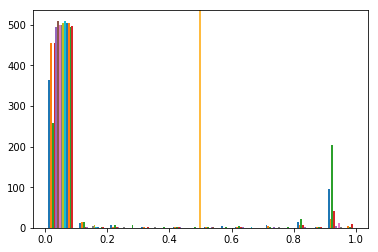

In [168]:
plt.hist(pred_valid_proba)
_ = plt.axvline(x=0.5, color='orange')

In [169]:
# save
with open('model.pkl','wb') as f:
    pickle.dump(clf,f)